In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml


# Load the Boston Housing dataset using fetch_openml
boston = fetch_openml(data_id=531)

# Create a Pandas DataFrame from the dataset
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston_df[boston.feature_names], boston_df['MEDV'], test_size=0.3, random_state=42)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


LinearRegression()

In [25]:
# Make predictions
predictions = model.predict(X_test.to_numpy())

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.metrics import mean_squared_error
# Evaluate the model

test_mse = mean_squared_error(y_test.to_numpy(), predictions)
print('Test MSE:', test_mse)

Test MSE: 21.517444231177247


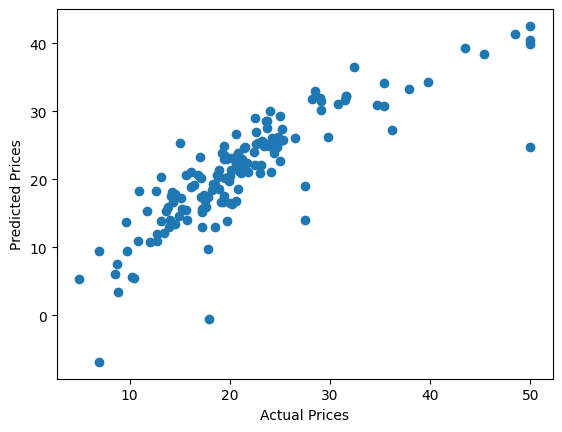

In [27]:
# Create scatter plots of each feature against the target variable
# Plot the actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

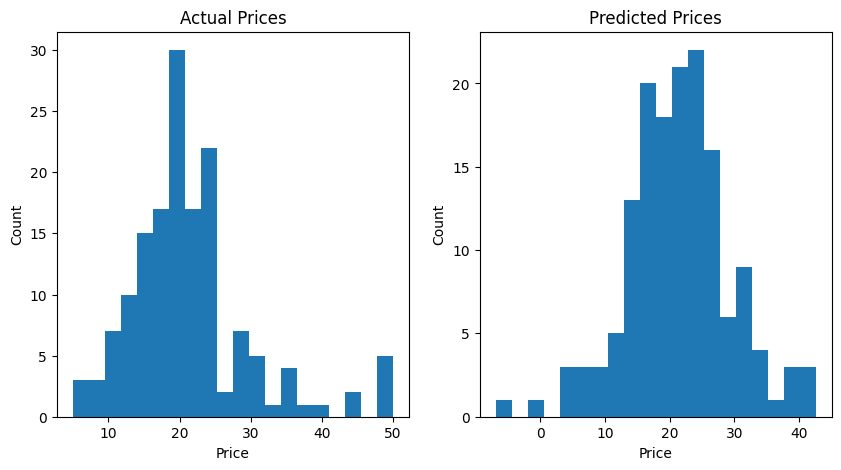

In [28]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the actual prices
axs[0].hist(y_test, bins=20)
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Count')
axs[0].set_title('Actual Prices')

# Plot the predicted prices
axs[1].hist(predictions, bins=20)
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')
axs[1].set_title('Predicted Prices')

# Show the plot
plt.show()